<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/Knn_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
import numpy as np


Load IRIS database and do K-NN clasification.

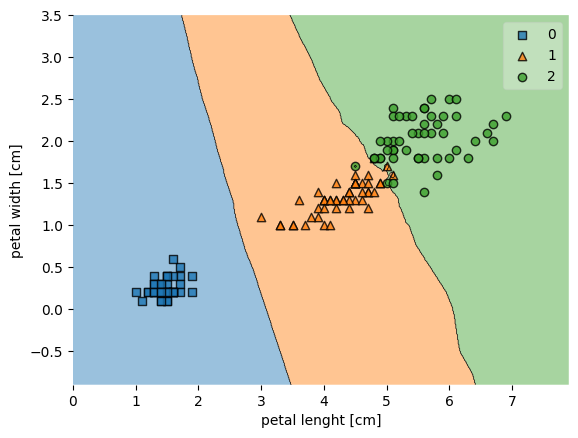

In [42]:
X, y = load_iris(return_X_y=True)
knn_model = KNeighborsClassifier(n_neighbors=30, weights='distance', p=2)
knn_model.fit(X[:,2:], y)
plot_decision_regions(X[:,2:], y, knn_model)
plt.xlabel('petal lenght [cm]')
plt.ylabel('petal width [cm]')
plt.show()

In [43]:
y_pred = knn_model.predict(X[:,2:])
print("Number of mislabeled points out of a total %d points : %d"  % (X.shape[0], (y != y_pred).sum()))
print("Accuracy score from sklearn library:= %2.2f " %( 100 * metrics.accuracy_score(y,y_pred)))


Number of mislabeled points out of a total 150 points : 1
Accuracy score from sklearn library:= 99.33 


Let's check the accuracy for a range of K 2-50

In [44]:
k_range = range(2,50)
scores ={}
scores_list =[]
for k in k_range:
  k_nn = KNeighborsClassifier(n_neighbors=k,weights='uniform', p=2)
  k_nn.fit(X, y)
  y_pred = k_nn.predict(X)
  scores[k]=metrics.accuracy_score(y,y_pred)
  scores_list.append(metrics.accuracy_score(y,y_pred))



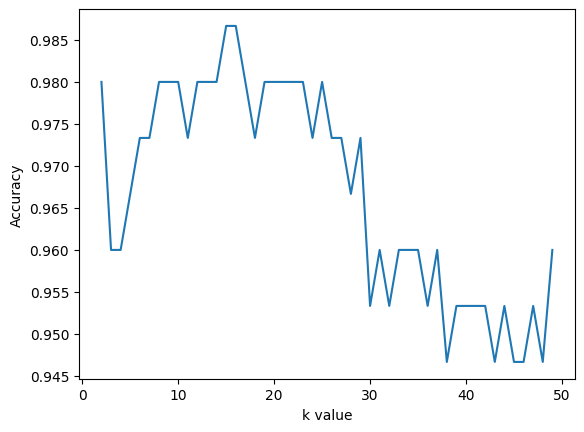

In [45]:
plt.plot(k_range, scores_list)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()

Let's do in correct way by spliting data into training, validation and testing sets with stratified spliting


In [46]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True, stratify=y)
np.bincount(y_temp)

array([40, 40, 40])

In [47]:
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.2, random_state=1, shuffle=True, stratify=y_temp)
X_train.shape

(96, 4)

Scaling data by normalisation.


In [48]:
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)

X_train_std=(X_train -mu)/sigma
X_test_std=(X_test -mu)/sigma
X_valid_std=(X_valid -mu)/sigma

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_mm=scaler.transform(X_train)
X_test_mm=scaler.transform(X_test)
X_valid_mm=scaler.transform(X_valid)

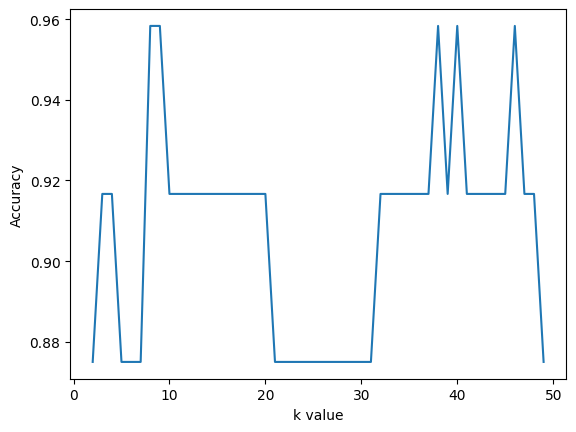

a= 6
best k= 8
Accuracy score from sklearn library:= 96.67 


In [51]:
k_range = range(2,50)
scores ={}
scores_list =[]
P_val=2
for k in k_range:
  k_nn = KNeighborsClassifier(n_neighbors=k,weights='distance', p=P_val)
  k_nn.fit(X_train, y_train)
  y_pred = k_nn.predict(X_valid)
  scores[k]=metrics.accuracy_score(y_valid,y_pred)
  scores_list.append(metrics.accuracy_score(y_valid,y_pred))

plt.plot(k_range, scores_list)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()
a=np.argmax(scores_list)
print('a=', a)
best_k=k_range[a]
print('best k=', best_k)

k_nn = KNeighborsClassifier(n_neighbors=best_k,weights='distance', p=P_val)
k_nn.fit(X_train, y_train)
y_pred = k_nn.predict(X_test)
print("Accuracy score from sklearn library:= %2.2f " %( 100 * metrics.accuracy_score(y_test,y_pred)))

With STANDARTISATION STD

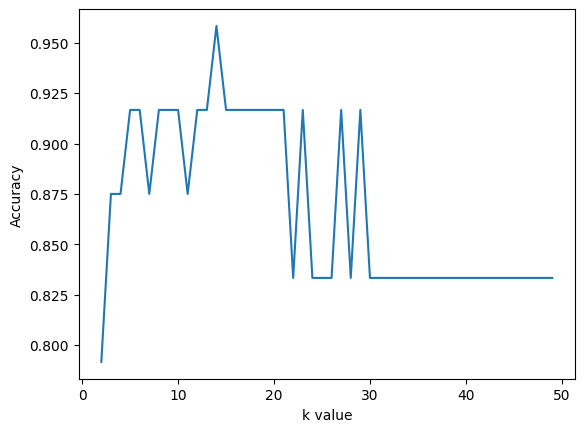

a= 12
best k= 14
Accuracy score from sklearn library:= 96.67 


In [52]:
k_range = range(2,50)
scores ={}
scores_list =[]
P_val=2
for k in k_range:
  k_nn = KNeighborsClassifier(n_neighbors=k,weights='distance', p=P_val)
  k_nn.fit(X_train_std, y_train)
  y_pred = k_nn.predict(X_valid_std)
  scores[k]=metrics.accuracy_score(y_valid,y_pred)
  scores_list.append(metrics.accuracy_score(y_valid,y_pred))

plt.plot(k_range, scores_list)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()
a=np.argmax(scores_list)
print('a=', a)
best_k=k_range[a]
print('best k=', best_k)

k_nn = KNeighborsClassifier(n_neighbors=best_k,weights='distance', p=P_val)
k_nn.fit(X_train_std, y_train)
y_pred = k_nn.predict(X_test_std)
print("Accuracy score from sklearn library:= %2.2f " %( 100 * metrics.accuracy_score(y_test,y_pred)))

MIN-MAX scaling

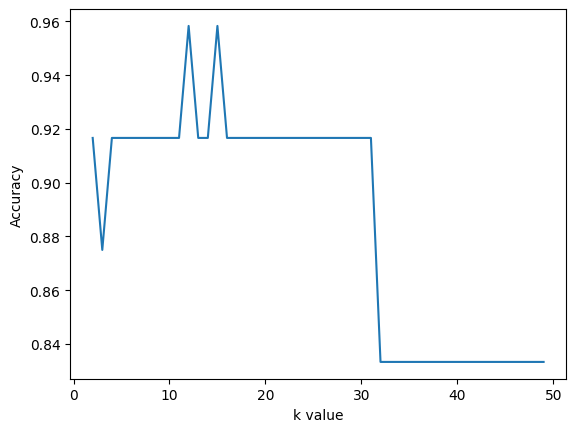

a= 10
best k= 12
Accuracy score from sklearn library:= 96.67 


In [53]:
k_range = range(2,50)
scores ={}
scores_list =[]
P_val=3
for k in k_range:
  k_nn = KNeighborsClassifier(n_neighbors=k, p=P_val)
  k_nn.fit(X_train_mm, y_train)
  y_pred = k_nn.predict(X_valid_mm)
  scores[k]=metrics.accuracy_score(y_valid,y_pred)
  scores_list.append(metrics.accuracy_score(y_valid,y_pred))

plt.plot(k_range, scores_list)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()
a=np.argmax(scores_list)
print('a=', a)
best_k=k_range[a]
print('best k=', best_k)

k_nn = KNeighborsClassifier(n_neighbors=best_k, p=P_val)
k_nn.fit(X_train_mm, y_train)
y_pred = k_nn.predict(X_test_mm)
print("Accuracy score from sklearn library:= %2.2f " %( 100 * metrics.accuracy_score(y_test,y_pred)))

In [54]:
X_train_mm[0:40,0:]=np.nan
X_train_mm

array([[       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,

In [55]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_mm = imputer.fit_transform(X_train_mm)
X_train_mm

array([[0.47470238, 0.50680272, 0.51029056, 0.48958333],
       [0.47470238, 0.50680272, 0.51029056, 0.48958333],
       [0.47470238, 0.50680272, 0.51029056, 0.48958333],
       [0.47470238, 0.50680272, 0.51029056, 0.48958333],
       [0.47470238, 0.50680272, 0.51029056, 0.48958333],
       [0.47470238, 0.50680272, 0.51029056, 0.48958333],
       [0.47470238, 0.50680272, 0.51029056, 0.48958333],
       [0.47470238, 0.50680272, 0.51029056, 0.48958333],
       [0.47470238, 0.50680272, 0.51029056, 0.48958333],
       [0.47470238, 0.50680272, 0.51029056, 0.48958333],
       [0.47470238, 0.50680272, 0.51029056, 0.48958333],
       [0.47470238, 0.50680272, 0.51029056, 0.48958333],
       [0.47470238, 0.50680272, 0.51029056, 0.48958333],
       [0.47470238, 0.50680272, 0.51029056, 0.48958333],
       [0.47470238, 0.50680272, 0.51029056, 0.48958333],
       [0.47470238, 0.50680272, 0.51029056, 0.48958333],
       [0.47470238, 0.50680272, 0.51029056, 0.48958333],
       [0.47470238, 0.50680272,

In [57]:
import numpy as np
np.bool = np.bool_

In [82]:
from sklearn.model_selection import GridSearchCV
from mlxtend.evaluate import PredefinedHoldoutSplit
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris, load_breast_cancer

iris = load_iris()
X, y = iris.data, iris.target

train_ind, valid_ind = train_test_split(np.arange(X.shape[0]),
                                        test_size=0.2, shuffle=True,
                                        random_state=123, stratify=y)

pipe = make_pipeline(('scaler'),
                     KNeighborsClassifier())

params = {'scaler': [MinMaxScaler(), StandardScaler(), 'passthrough'],
          'kneighborsclassifier__n_neighbors': range(3,20),
          'kneighborsclassifier__p': [1, 2],
          'kneighborsclassifier__weights': ['uniform', 'distance']}

split = PredefinedHoldoutSplit(valid_indices=valid_ind)

grid = GridSearchCV(pipe,
                    param_grid=params,
                    cv=split)

grid.fit(X, y)

GridSearchCV(cv=<mlxtend.evaluate.holdout.PredefinedHoldoutSplit object at 0x7d1184ff97e0>,
             estimator=Pipeline(steps=[('scaler', 'scaler'),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(3, 20),
                         'kneighborsclassifier__p': [1, 2],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance'],
                         'scaler': [MinMaxScaler(), StandardScaler(),
                                    'passthrough']})

In [85]:
grid.cv_results_

{'mean_fit_time': array([0.0024662 , 0.00207043, 0.00101519, 0.00178242, 0.00192189,
        0.00096655, 0.00167537, 0.00191379, 0.0010705 , 0.00217795,
        0.00175428, 0.00109673, 0.00173378, 0.00206351, 0.00105715,
        0.00203228, 0.00181794, 0.00110435, 0.00160193, 0.00195432,
        0.00113487, 0.00178289, 0.00192118, 0.0011549 , 0.00168777,
        0.00183368, 0.00097775, 0.00171328, 0.00173044, 0.00105691,
        0.0016005 , 0.00187016, 0.00112891, 0.00173235, 0.00192046,
        0.00091338, 0.00172091, 0.00194693, 0.00112104, 0.00174999,
        0.00199556, 0.00305438, 0.00175595, 0.00202942, 0.00115323,
        0.00198674, 0.00200844, 0.001127  , 0.00176024, 0.00199914,
        0.00141644, 0.00428891, 0.00207758, 0.0010407 , 0.00436234,
        0.00209332, 0.00111938, 0.00185847, 0.00197339, 0.00115609,
        0.00189495, 0.00214005, 0.00174689, 0.00197291, 0.00202203,
        0.00115919, 0.00172782, 0.00208235, 0.00112534, 0.00167751,
        0.00201011, 0.00118613,

In [83]:
print(grid.best_score_)
print(grid.best_params_)

0.9666666666666667
{'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform', 'scaler': StandardScaler()}


In [84]:
clf = grid.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True, stratify=y)
clf.fit(X_train, y_train)
print('Test accuracy: %.2f%%' % (clf.score(X_test, y_test)*100))

Test accuracy: 96.67%
